In [1]:
#Dependencies
import pandas as pd
import numpy as np
import os
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
#File paths
folder_path = "."  
file_part4 = os.path.join(folder_path, "morticd10_part4_cleaned_df.csv")
file_part5 = os.path.join(folder_path, "morticd10_part5_cleaned_df.csv")


In [3]:
#Double Checking current working directory
print("Current working directory:", os.getcwd())


Current working directory: c:\Users\User\Desktop\Project_3\Project3\cleaneddata


In [4]:
#Loading the datasets if not error
try:
    part4_df = pd.read_csv(file_part4)
    part5_df = pd.read_csv(file_part5)
    print("Datasets loaded successfully!")
except FileNotFoundError as e:
    print(f"Error: {e}")

Datasets loaded successfully!


In [5]:
#We are going to load the CSV file containing the country codes into a DataFrame
country_codes_path = os.path.join(folder_path, "data/country_codes.csv")



In [6]:
#Checking Directory
print("Current Working Directory:", os.getcwd())

#Listing all files in the `cleaneddata` directory if it exists
cleaneddata_path = './cleaneddata'
if os.path.exists(cleaneddata_path):
	print("Files in `cleaneddata` directory:")
	print(os.listdir(cleaneddata_path))
else:
	print(f"Directory `{cleaneddata_path}` does not exist.")

#List all files in the `data` directory if it exists
data_path = './data'
if os.path.exists(data_path):
	print("Files in `data` directory:")
	print(os.listdir(data_path))
else:
	print(f"Directory `{data_path}` does not exist.")



Current Working Directory: c:\Users\User\Desktop\Project_3\Project3\cleaneddata
Files in `cleaneddata` directory:
['morticd10_part4_cleaned_df.csv', 'morticd10_part5_cleaned_df.csv']
Files in `data` directory:
[]


In [7]:
#There were two "data" folders, we were verifying the correct with the rigth file path
import os

data_path = "./data"
if os.path.exists(data_path):
    print(f"Files in {data_path} directory:")
    print(os.listdir(data_path))
else:
    print(f"Directory {data_path} does not exist.")


Files in ./data directory:
[]


In [8]:
# Print the current working directory
print(f"Current working directory: {os.getcwd()}")


Current working directory: c:\Users\User\Desktop\Project_3\Project3\cleaneddata


In [9]:
#display country_codes_path 
country_codes_path = "C:/Users/User/Desktop/Project_3/Project3/data/country_codes.csv"
country_codes_path



'C:/Users/User/Desktop/Project_3/Project3/data/country_codes.csv'

In [10]:
#Importing the country codes CSV file into a DataFrame

country_codes_path = "C:/Users/User/Desktop/Project_3/Project3/data/country_codes.csv"

# Check if the file exists and is not empty
if os.path.exists(country_codes_path) and os.path.getsize(country_codes_path) > 0:
    country_codes_df = pd.read_csv(country_codes_path)
    print(country_codes_df.head())
else:
    print(f"Error: The file {country_codes_path} does not exist or is empty.")



   country          name
0     1010       Algeria
1     1020        Angola
2     1025         Benin
3     1030      Botswana
4     1035  Burkina Faso


In [11]:
#Creating the DataFrame with the due Country Name matching the code

#Extracting Column 
country_codes_df.columns = ['Country_code', 'Country_name']

#Merging the DataFrames, 
#'Country' in `part4_df` matches 'Country_code' in `country_codes_df`
part4_df = part4_df.merge(country_codes_df, left_on='Country', right_on='Country_code', how='left')

#Eliminating the 'Country_code' column after the merge if no longer needed
part4_df = part4_df.drop(columns=['Country_code'])

#Displaying the updated DataFrame
print(part4_df.head())


   Country  Year  List Cause  Sex  Deaths1  IM_Deaths1  IM_Deaths2  \
0     1400  2013   101  1000    1      383         5.0         1.0   
1     1400  2013   101  1000    2      334         2.0         7.0   
2     1400  2013   101  1001    1       28         0.0         0.0   
3     1400  2013   101  1001    2       30         0.0         2.0   
4     1400  2013   101  1002    1        0         0.0         0.0   

   IM_Deaths3  IM_Deaths4  mort_1_4  mort_5_24  mort_25_44  mort_45_64  \
0         2.0         4.0       0.0        6.0        44.0       103.0   
1         3.0         5.0       2.0        3.0        20.0        60.0   
2         0.0         0.0       0.0        0.0         6.0        11.0   
3         2.0         1.0       0.0        0.0         0.0         6.0   
4         0.0         0.0       0.0        0.0         0.0         0.0   

   mort_65_84  mort_85_95+  Deaths26 Country_name  
0       218.0          0.0       0.0   Seychelles  
1       232.0          0.0    

In [12]:
#Setting up the Country_Name next to Code_Country to place Country_name in column A and Country in column B
column_order = ['Country_name', 'Country'] + [col for col in part4_df.columns if col not in ['Country_name', 'Country']]
part4_df = part4_df[column_order]

#Output path
output_path = os.path.join('./cleaneddata', "latests_version_part4_reordered.csv")

#Double Checking the directory exists
os.makedirs('./cleaneddata', exist_ok=True)

#Exporting the reordered DataFrame to a new CSV file
part4_df.to_csv(output_path, index=False)


#Displaying the new DataFrame edited with the right code coutnry and country name
print(part4_df.head())


  Country_name  Country  Year  List Cause  Sex  Deaths1  IM_Deaths1  \
0   Seychelles     1400  2013   101  1000    1      383         5.0   
1   Seychelles     1400  2013   101  1000    2      334         2.0   
2   Seychelles     1400  2013   101  1001    1       28         0.0   
3   Seychelles     1400  2013   101  1001    2       30         0.0   
4   Seychelles     1400  2013   101  1002    1        0         0.0   

   IM_Deaths2  IM_Deaths3  IM_Deaths4  mort_1_4  mort_5_24  mort_25_44  \
0         1.0         2.0         4.0       0.0        6.0        44.0   
1         7.0         3.0         5.0       2.0        3.0        20.0   
2         0.0         0.0         0.0       0.0        0.0         6.0   
3         2.0         2.0         1.0       0.0        0.0         0.0   
4         0.0         0.0         0.0       0.0        0.0         0.0   

   mort_45_64  mort_65_84  mort_85_95+  Deaths26  
0       103.0       218.0          0.0       0.0  
1        60.0       232.0 

In [13]:

#Path to the Cause_List.csv file
file_path = "C:/Users/User/Desktop/Project_3/Project3/data/Cause_List.csv"

#Loading the CSV into a DataFrame
cause_list_df = pd.read_csv(file_path)

#Extracting columns A and C 
new_cause_list_df = cause_list_df.iloc[:, [0, 2]]

#Displaying the new DataFrame
print(new_cause_list_df)




     code                                              Cause
0    1000                                         All causes
1    1001          Certain infectious and parasitic diseases
2    1002                                            Cholera
3    1003  Diarrhoea and gastroenteritis of presumed infe...
4    1004               Other intestinal infectious diseases
..    ...                                                ...
102  1102                                            Assault
103  1103                          All other external causes
104  1901  Severe acute respiratory syndrome [SARS], unsp...
105  1902                            Vaping-related disorder
106  1903                                           COVID-19

[107 rows x 2 columns]


In [14]:
#Path to the reordered CSV file
latests_version_part4_reordered = pd.read_csv(output_path)

#Showing the dataframe to confirm it loaded correctly with Conuntry_Name and Country columns in the right order 
print(latests_version_part4_reordered.head())

#Avoiding issue another CSV file if exists
output_path_reordered = './cleandata/latest_version_part4_reordered.csv'

if not os.path.exists(output_path_reordered):
    part4_df.to_csv(output_path_reordered, index=False)



  Country_name  Country  Year  List Cause  Sex  Deaths1  IM_Deaths1  \
0   Seychelles     1400  2013   101  1000    1      383         5.0   
1   Seychelles     1400  2013   101  1000    2      334         2.0   
2   Seychelles     1400  2013   101  1001    1       28         0.0   
3   Seychelles     1400  2013   101  1001    2       30         0.0   
4   Seychelles     1400  2013   101  1002    1        0         0.0   

   IM_Deaths2  IM_Deaths3  IM_Deaths4  mort_1_4  mort_5_24  mort_25_44  \
0         1.0         2.0         4.0       0.0        6.0        44.0   
1         7.0         3.0         5.0       2.0        3.0        20.0   
2         0.0         0.0         0.0       0.0        0.0         6.0   
3         2.0         2.0         1.0       0.0        0.0         0.0   
4         0.0         0.0         0.0       0.0        0.0         0.0   

   mort_45_64  mort_65_84  mort_85_95+  Deaths26  
0       103.0       218.0          0.0       0.0  
1        60.0       232.0 

In [15]:
#1ST DATA FRAME TO MERGE 
print(latests_version_part4_reordered.head())


  Country_name  Country  Year  List Cause  Sex  Deaths1  IM_Deaths1  \
0   Seychelles     1400  2013   101  1000    1      383         5.0   
1   Seychelles     1400  2013   101  1000    2      334         2.0   
2   Seychelles     1400  2013   101  1001    1       28         0.0   
3   Seychelles     1400  2013   101  1001    2       30         0.0   
4   Seychelles     1400  2013   101  1002    1        0         0.0   

   IM_Deaths2  IM_Deaths3  IM_Deaths4  mort_1_4  mort_5_24  mort_25_44  \
0         1.0         2.0         4.0       0.0        6.0        44.0   
1         7.0         3.0         5.0       2.0        3.0        20.0   
2         0.0         0.0         0.0       0.0        0.0         6.0   
3         2.0         2.0         1.0       0.0        0.0         0.0   
4         0.0         0.0         0.0       0.0        0.0         0.0   

   mort_45_64  mort_65_84  mort_85_95+  Deaths26  
0       103.0       218.0          0.0       0.0  
1        60.0       232.0 

In [16]:
#2ND DATA FRAME TO MERGE
print(new_cause_list_df.head()) 

   code                                              Cause
0  1000                                         All causes
1  1001          Certain infectious and parasitic diseases
2  1002                                            Cholera
3  1003  Diarrhoea and gastroenteritis of presumed infe...
4  1004               Other intestinal infectious diseases


In [17]:
#Chaning the column names to match the column names in the other DataFrame
new_cause_list_df.rename(columns={"code": "Cause_Code", "Cause": "Cause_Name"}, inplace=True)
new_cause_list_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_9468\3441228761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cause_list_df.rename(columns={"code": "Cause_Code", "Cause": "Cause_Name"}, inplace=True)


,Cause_Code,Cause_Name
0,1000,All causes
1,1001,Certain infectious and parasitic diseases
2,1002,Cholera
3,1003,Diarrhoea and gastroenteritis of presumed infe...
4,1004,Other intestinal infectious diseases


In [18]:
#Checking on both columns are strings 
latests_version_part4_reordered['Cause'] = latests_version_part4_reordered['Cause'].astype(str)
new_cause_list_df['Cause_Code'] = new_cause_list_df['Cause_Code'].astype(str)

#Merging the two DataFrames: `latests_version_part4_reordered` and `new_cause_list_df`
part4_df = latests_version_part4_reordered.merge(new_cause_list_df, left_on='Cause', right_on='Cause_Code', how='left')

#Displaying the updated DataFrame
print(part4_df.head())



C:\Users\User\AppData\Local\Temp\ipykernel_9468\218226482.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cause_list_df['Cause_Code'] = new_cause_list_df['Cause_Code'].astype(str)


  Country_name  Country  Year  List Cause  Sex  Deaths1  IM_Deaths1  \
0   Seychelles     1400  2013   101  1000    1      383         5.0   
1   Seychelles     1400  2013   101  1000    2      334         2.0   
2   Seychelles     1400  2013   101  1001    1       28         0.0   
3   Seychelles     1400  2013   101  1001    2       30         0.0   
4   Seychelles     1400  2013   101  1002    1        0         0.0   

   IM_Deaths2  IM_Deaths3  IM_Deaths4  mort_1_4  mort_5_24  mort_25_44  \
0         1.0         2.0         4.0       0.0        6.0        44.0   
1         7.0         3.0         5.0       2.0        3.0        20.0   
2         0.0         0.0         0.0       0.0        0.0         6.0   
3         2.0         2.0         1.0       0.0        0.0         0.0   
4         0.0         0.0         0.0       0.0        0.0         0.0   

   mort_45_64  mort_65_84  mort_85_95+  Deaths26 Cause_Code  \
0       103.0       218.0          0.0       0.0       1000   
1 

In [19]:
#Changing the column order, to have the columns in the right order after list, code cause and cause name, 
columns_before_list = ["Country_name", "Country", "Year", "List"]
columns_after_list = ["Cause_Code", "Cause_Name"]
remaining_columns = [col for col in part4_df.columns if col not in columns_before_list + columns_after_list]

#Final Output Order 
final_column_order = columns_before_list + columns_after_list + remaining_columns
part4_df = part4_df[final_column_order]

#Printing the updated version
print(part4_df.head())

#List and Cause_Code Cause_Name are related.  The list is needed to find the cause of death



  Country_name  Country  Year  List Cause_Code  \
0   Seychelles     1400  2013   101       1000   
1   Seychelles     1400  2013   101       1000   
2   Seychelles     1400  2013   101       1001   
3   Seychelles     1400  2013   101       1001   
4   Seychelles     1400  2013   101       1002   

                                  Cause_Name Cause  Sex  Deaths1  IM_Deaths1  \
0                                 All causes  1000    1      383         5.0   
1                                 All causes  1000    2      334         2.0   
2  Certain infectious and parasitic diseases  1001    1       28         0.0   
3  Certain infectious and parasitic diseases  1001    2       30         0.0   
4                                    Cholera  1002    1        0         0.0   

   IM_Deaths2  IM_Deaths3  IM_Deaths4  mort_1_4  mort_5_24  mort_25_44  \
0         1.0         2.0         4.0       0.0        6.0        44.0   
1         7.0         3.0         5.0       2.0        3.0        20.0

In [20]:
#Saving the updated DataFrame into a CSV file in the same folder
output_path_with_causes = "./cleandata/latest_version_part4_with_causes.csv"
output_path_reordered = "./cleandata/latest_version_part4_reordered.csv"
#Final DataFrame with causes
part4_df.to_csv(output_path_with_causes, index=False)
#Verifying the file was saved and to avoid duplicates
latests_version_part4_reordered.to_csv(output_path_reordered, index=False)
#dISPLAYING THE MESSAGE
print(f"Files saved successfully to the same folder:\n- {output_path_with_causes}\n- {output_path_reordered}")



Files saved successfully to the same folder:
- ./cleandata/latest_version_part4_with_causes.csv
- ./cleandata/latest_version_part4_reordered.csv


In [ ]:
#Recalculating the top 10 causes excluding "All Causes" or "AAA"
top10_causes = part4_df[part4_df["Cause_Name"] != "AAA"].groupby("Cause_Name")["Deaths1"].sum().nlargest(10)
top10_causes

In [27]:
#Percentage by cause of death
top10_causes_percentage = top10_causes / top10_causes.sum() * 100
print(top10_causes_percentage)



Cause_Name
All causes                                                                                 41.409568
Diseases of the circulatory system                                                         21.718593
Ischaemic heart diseases                                                                   12.193208
Neoplasms                                                                                   6.305302
Cerebrovascular diseases                                                                    6.280831
External causes of morbidity and mortality                                                  3.705815
Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified     2.926729
Diseases of the digestive system                                                            2.035821
Other heart diseases                                                                        1.892519
Diseases of the respiratory system                                              

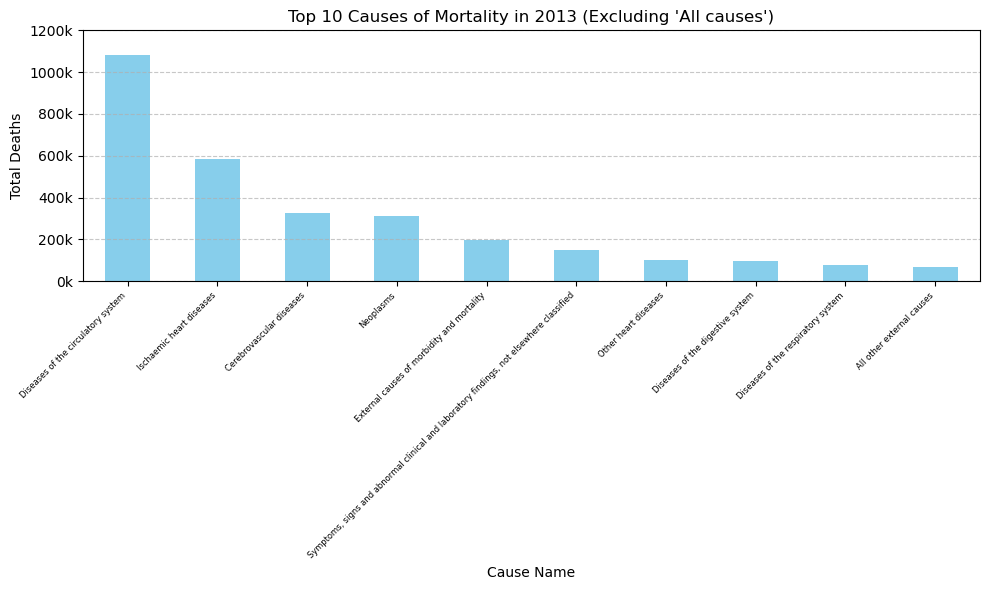

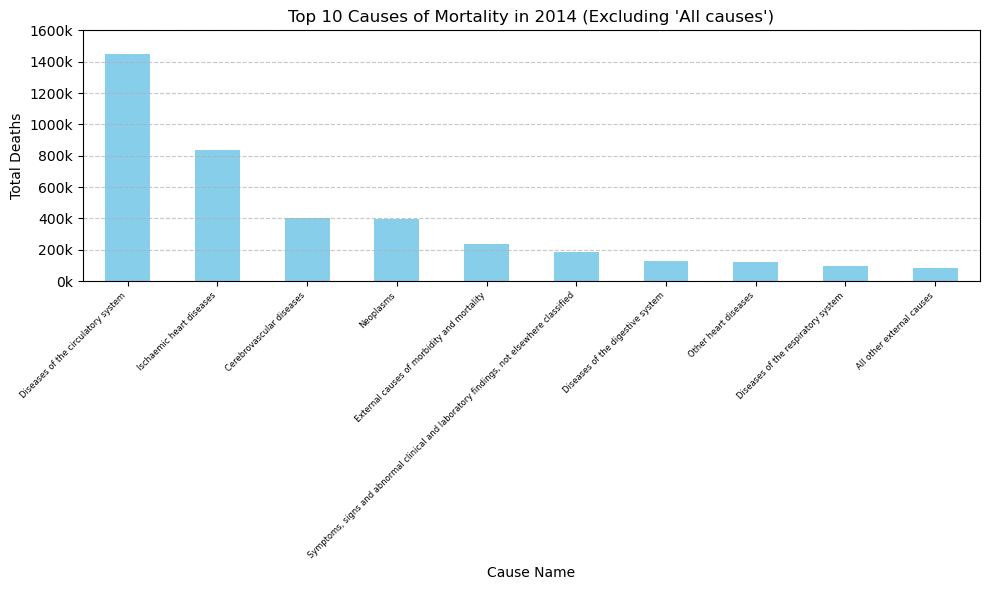

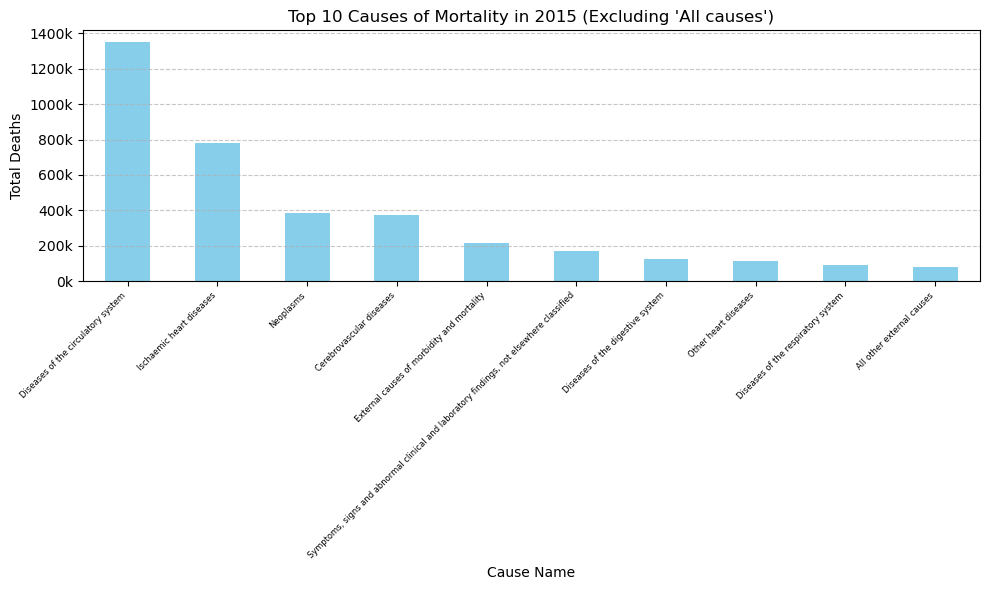

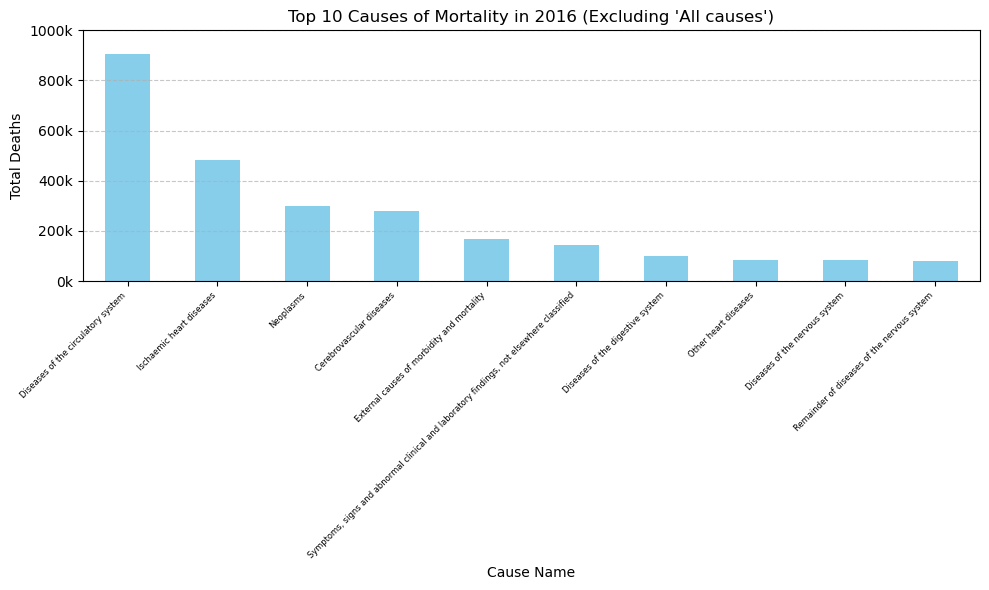

In [28]:
# Filter data to exclude "All causes" and "AAA"
filtered_data = part4_df[~part4_df["Cause_Name"].isin(["All causes", "AAA"])]

# Get unique years from the DataFrame
years = sorted(filtered_data["Year"].unique())

# Iterate through each year to plot the top 10 causes
for year in years:
    yearly_data = filtered_data[filtered_data["Year"] == year]
    #Using the Groupby Function wuth 'Cause_Name' to calculate the total for 'Deaths1', to later get the top 10
    top_10_yearly = yearly_data.groupby("Cause_Name")["Deaths1"].sum().nlargest(10)

    #Graph Top 10 causes eachyear
    plt.figure(figsize=(10, 6))
    ax = top_10_yearly.plot(kind="bar", color="skyblue")

    #Y-axis set-up to show numbers each 200k deaths
    ax.set_yticks(range(0, int(top_10_yearly.max() + 200000), 200000))  # Add ticks every 200,000
    ax.set_yticklabels([f"{int(y/1000)}k" for y in ax.get_yticks()])  # Label ticks in thousands

    #Labeling the graph
    plt.title(f"Top 10 Causes of Mortality in {year} (Excluding 'All causes')")
    plt.xlabel("Cause Name")
    plt.ylabel("Total Deaths")
    plt.xticks(rotation=45, ha="right", fontsize=6)
    plt.grid(axis="y", linestyle="--", alpha=0.7)  
    plt.tight_layout()
    plt.show()

    #Because this dataset is from 2013 to 2016, we are going to plot the top 10 causes of death for each year from 2013 to 2016


